## Entrenamiento de modelos de clasificación.

En esta etapa, me centraré en desarrollar y entrenar modelos de ML que sean capaces de clasificar las observaciones de mi conjunto de datos para predecir posibles futuros clientes que contraten el seguro de viajes. Para lograrlo, seleccionaré y probaré diferentes algoritmos de clasificación, como regresión logística, árboles de decisión, máquinas de vectores de soporte, entre otros, con el objetivo de encontrar el modelo que mejor se ajuste a los datos y proporcione resultados precisos y confiables para el caso de estudio.

A lo largo del proceso de entrenamiento, también llevaré a cabo la validación cruzada y la optimización de hiperparámetros para garantizar que el modelo generalice bien y evite problemas como el sobreajuste o el subajuste. Una vez que haya identificado el modelo de clasificación más adecuado, procederé a evaluar su rendimiento utilizando métricas apropiadas, como precisión, exhaustividad, F1-score y matriz de confusión, antes de implementarlo en producción.

Como hemos comprobado en el EDA el target tiene un desequilibrio entre las dos clases leve, lo que podría afectar negativamente el rendimiento de los modelos de clasificación. Para abordar este problema, implemento diversas técnicas de muestreo y balanceo de clases, con el fin de mejorar la precisión y robustez de los modelos.

In [43]:
import pandas as pd
df = pd.read_csv('./Travel_espanol.csv')

df=df.set_index('ID')
df

,Edad,Tipo_Empleo,Graduado_Universitario,Ingreso_Anual,Miembros_Familia,Enfermedades_Cronicas,Viajero_Frecuente,Visito_Extranjero,Seguro_Viajes
ID,,,,,,,,,
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0


## Train y Test

Divido el dataframe en los conjuntos de Train y Test, en una proporción del 80% y del 20% respectivamente, con una seed predefinida.


In [44]:
from sklearn import model_selection


X=df[['Edad','Tipo_Empleo','Graduado_Universitario','Ingreso_Anual','Miembros_Familia','Enfermedades_Cronicas','Viajero_Frecuente','Visito_Extranjero']]
Y=df[['Seguro_Viajes']]

validation_size = 0.2
seed = 42
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,
                                                                    test_size=validation_size,
                                                                    random_state = seed)



## Estandarizar

Para garantizar la calidad de los resultados y evitar la contaminación cruzada, estandarizo las particiones de datos de entrenamiento y prueba por separado. La estandarización me parece más adecuada, ya que es un proceso que transforma las variables numéricas para que tengan una media de 0 y una desviación estándar de 1, lo que facilita el aprendizaje y mejora el rendimiento de muchos algoritmos.

Por lo tanto, elijo estandarizar los datos en lugar de escalarlos, ya que la estandarización no solo ajusta el rango de los valores, sino que también los centra alrededor de la media y considera la distribución de los datos. 

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

Inicio con la Regresión Logística, y observo que la matriz de confusión revela dificultades en identificar correctamente la clase 1 frente a la clase 0. Para enfrentar este problema, exploraré distintos algoritmos, técnicas de balanceo de clases y ajustes de hiperparámetros, buscando mejorar la identificación de ambas clases.

Accuracy: 0.7688442211055276
Precision: 0.7692307692307693
Recall: 0.49645390070921985
F1 Score: 0.603448275862069
ROC AUC Score: 0.7073709192262052
Predictions: [0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


C:\Users\Didac\AppData\Local\Temp\ipykernel_8236\1950573151.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')


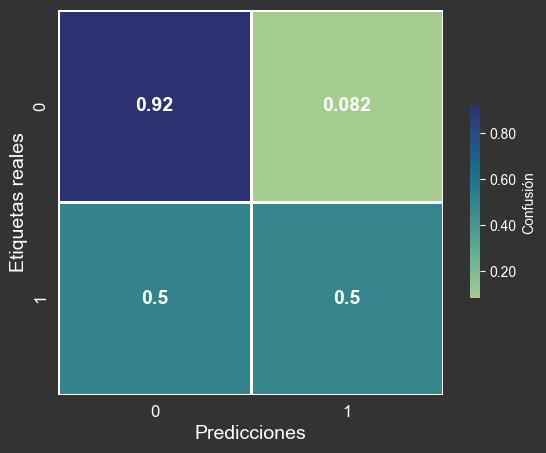

In [47]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_reg = LogisticRegression()


log_reg.fit(X_train, Y_train.values.ravel())

Y_pred = log_reg.predict(X_test)

# Calcular la matriz de confusión normalizada
c_mat = confusion_matrix(Y_test, Y_pred)
c_mat_normalized = c_mat / c_mat.sum(axis=1)[:, np.newaxis]

sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(7,5))
plt.gcf().set_facecolor('#333333')

ax = sns.heatmap(c_mat_normalized, annot=True, cmap="crest", cbar=True,
                 cbar_kws={"label": "confusión", "orientation": "vertical",
                           "shrink": 0.5, "format": "%.2f", "extend": "neither",
                           "extendfrac": None, "extendrect": False, "drawedges": False},
                 linewidths=1, linecolor='white', square=True,
                 annot_kws={"color": "white", "fontsize": 14, "weight": "bold"})  # Modificado aquí

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(color='white', labelsize=10)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')
cbar.set_label("Confusión", color='white')

labels_x = ax.get_xticklabels()
labels_y = ax.get_yticklabels()
ax.set_xticklabels(labels_x, fontsize=12, color='white')
ax.set_yticklabels(labels_y, fontsize=12, color='white')

plt.xlabel('Predicciones', fontsize=14, color='white')
plt.ylabel('Etiquetas reales', fontsize=14, color='white')

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Predictions:", Y_pred)

Accuracy: 0.7261306532663316
Precision: 0.6194029850746269
Recall: 0.5886524822695035
F1 Score: 0.6036363636363636
ROC AUC Score: 0.6951044512514833
Predictions: [0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0]


C:\Users\Didac\AppData\Local\Temp\ipykernel_8236\1324209736.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')


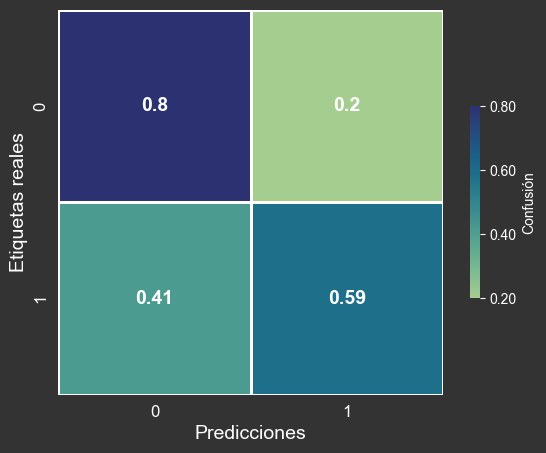

In [49]:
from sklearn.linear_model import LogisticRegression

# Crear el objeto LogisticRegression con los pesos de las clases equilibrados
log_reg = LogisticRegression(class_weight='balanced')
Y_train = Y_train.values.ravel()

log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)



c_mat = confusion_matrix(Y_test, Y_pred)
c_mat_normalized = c_mat / c_mat.sum(axis=1)[:, np.newaxis]

sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(7,5))
plt.gcf().set_facecolor('#333333')

ax = sns.heatmap(c_mat_normalized, annot=True, cmap="crest", cbar=True,
                 cbar_kws={"label": "confusión", "orientation": "vertical",
                           "shrink": 0.5, "format": "%.2f", "extend": "neither",
                           "extendfrac": None, "extendrect": False, "drawedges": False},
                 linewidths=1, linecolor='white', square=True,
                 annot_kws={"color": "white", "fontsize": 14, "weight": "bold"})  # Modificado aquí

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(color='white', labelsize=10)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')
cbar.set_label("Confusión", color='white')

labels_x = ax.get_xticklabels()
labels_y = ax.get_yticklabels()
ax.set_xticklabels(labels_x, fontsize=12, color='white')
ax.set_yticklabels(labels_y, fontsize=12, color='white')

plt.xlabel('Predicciones', fontsize=14, color='white')
plt.ylabel('Etiquetas reales', fontsize=14, color='white')

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Predictions:", Y_pred)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



# Definición del modelo y de los parámetros a ajustar
log_reg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'penalty': ['l2']}


# Búsqueda de hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_train)


print(grid_search.cv_results_)

# Evaluación del modelo con los mejores hiperparámetros
best_estimator = grid_search.best_estimator_
best_estimator.fit(X_train, Y_train)
Y_pred = best_estimator.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Predictions:", Y_pred)

{'mean_fit_time': array([0.00488017, 0.0051187 , 0.00463593, 0.00540221, 0.00497124,
       0.00484526]), 'std_fit_time': array([0.00059458, 0.00037701, 0.00063165, 0.00119805, 0.00058545,
       0.00061673]), 'mean_score_time': array([0.00088952, 0.00037253, 0.00031297, 0.00084631, 0.00048285,
       0.00074093]), 'std_score_time': array([0.00064346, 0.00048461, 0.00047868, 0.00044049, 0.00051494,
       0.00049704]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2', 'l2'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1, 'penalty': 'l2'}, {'C': 10, 'penalty': 'l2'}, {'C': 100, 'penalty': 'l2'}], 'split0_test_score': array([0.754

## Nivelar clases

Pruebo diferentes técnicas de muestreo, como oversampling, undersampling y una combinación de ambos, para analizar si los resultados cambian y, especialmente, si se mejora el recall. Además, en aquellos modelos que lo permitan, aplicaré balanceo de pesos para ajustar la importancia de cada clase durante el proceso de entrenamiento, con el objetivo de obtener un mejor rendimiento en la clasificación. Finalmente también incorporo la opcion (Normal), es decir sin técnicas de equilibrio.

## Regresión logística

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
import pickle


log_reg = LogisticRegression(solver='liblinear')  # Cambio el solver a 'liblinear' para admitir penalización L1
log_reg_pesos = LogisticRegression(solver='liblinear', class_weight='balanced')  #para balancear pesos
grid_parametros = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'classifier__penalty': ['l1', 'l2']} 

# Creo instancias de las técnicas de muestreo
oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()
combinado = SMOTEENN()

# Creo Pipeline para cada modificación del modelo.
normal_pipeline = Pipeline([('classifier', log_reg)])
balanceado_pipeline = Pipeline([('classifier', log_reg_pesos)])
over_pipeline = ImbPipeline([('sampler', oversampler), ('classifier', log_reg)])
under_pipeline = ImbPipeline([('sampler', undersampler), ('classifier', log_reg)])
combinado_pipeline = ImbPipeline([('sampler', combinado), ('classifier', log_reg)])

# En este diccionario, se irán guardando todos los resultados.
resultados = {}

# Bucle para iniciar la busqeuda de los hiperparámetros de la validación cruzada.
for nombre, pipeline in [('Normal', normal_pipeline), ('Balanced', balanceado_pipeline), ('OverSampler', over_pipeline), ('UnderSampler', under_pipeline), ('SMOTEENN', combinado_pipeline)]:
    grid_search = GridSearchCV(pipeline, grid_parametros, cv=10, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    
    print(f"Resultados para {nombre}:")
    print(grid_search.cv_results_)

#Predicción con los mejores parametros.
    best_estimator = grid_search.best_estimator_
    Y_pred = best_estimator.predict(X_test)

    #Guardamos los resultados en el diccionraio de test y predicción.
    resultados[nombre] = {"GridSearchModel": grid_search,
                     "Accuracy": accuracy_score(Y_test, Y_pred),
                     "Precision": precision_score(Y_test, Y_pred),
                     "Recall": recall_score(Y_test, Y_pred),
                     "F1 Score": f1_score(Y_test, Y_pred),
                     "ROC AUC Score": roc_auc_score(Y_test, Y_pred),
                     "Predictions": Y_pred}


for nombre, metricas in resultados.items():
    print(f"\nResultados para {nombre}:")
    for metrica, value in metricas.items():
        print(f"{metrica}: {value}")

for nombre, metricas in resultados.items():
    with open(f"Modelos/Regresion_logistica_{nombre}_mejor_modelo.pkl", "wb") as f:
        pickle.dump(metricas["GridSearchModel"].best_estimator_, f)
    
    with open(f"Resultados/Regresion_logistica_{nombre}_resultados.txt", "w") as f:
        for metrica, value in metricas.items():
            if metrica != "Predictions": 
                f.write(f"{metrica}: {value}\n")

Resultados para Normal:
{'mean_fit_time': array([0.00100069, 0.00103042, 0.00121765, 0.00106719, 0.00140042,
       0.00110085, 0.00140066, 0.00119951, 0.00124919, 0.00159953,
       0.00171719, 0.001337  ]), 'std_fit_time': array([4.47087181e-04, 9.00145833e-05, 3.48948422e-04, 3.50383897e-04,
       4.89639845e-04, 2.99671613e-04, 4.92065668e-04, 3.99760968e-04,
       5.10570314e-04, 4.89770451e-04, 4.70582837e-04, 5.24465643e-04]), 'mean_score_time': array([0.00035062, 0.00040648, 0.00040014, 0.00031023, 0.00029976,
       0.00079894, 0.00019984, 0.00030055, 0.00050132, 0.0002002 ,
       0.00019944, 0.00010011]), 'std_score_time': array([0.00044998, 0.00049806, 0.00049007, 0.00047437, 0.0004579 ,
       0.00039947, 0.00039969, 0.0004591 , 0.00050134, 0.0004004 ,
       0.00039887, 0.00030034]), 'param_classifier__C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                   100],
             mask=[False, False, False, False, False, False, False,

## K-Neighbors

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline


k_neighbors = KNeighborsClassifier()
grid_parametros = {'classifier__n_neighbors': range(3, 31)}

oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()
combinado = SMOTEENN()


normal_pipeline = Pipeline([('classifier', k_neighbors)])
over_pipeline = ImbPipeline([('sampler', oversampler), ('classifier', k_neighbors)])
under_pipeline = ImbPipeline([('sampler', undersampler), ('classifier', k_neighbors)])
combinado_pipeline = ImbPipeline([('sampler', combinado), ('classifier', k_neighbors)])


resultados = {}


for nombre, pipeline in [('Normal', normal_pipeline), ('OverSampler', over_pipeline), ('UnderSampler', under_pipeline), ('SMOTEENN', combinado_pipeline)]:
    grid_search = GridSearchCV(pipeline, grid_parametros, cv=10, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    
    print(f"Resultados para {nombre}:")
    print(grid_search.cv_results_)


    best_estimator = grid_search.best_estimator_
    Y_pred = best_estimator.predict(X_test)

    resultados[nombre] = {"GridSearchModel": grid_search,
                     "Accuracy": accuracy_score(Y_test, Y_pred),
                     "Precision": precision_score(Y_test, Y_pred),
                     "Recall": recall_score(Y_test, Y_pred),
                     "F1 Score": f1_score(Y_test, Y_pred),
                     "ROC AUC Score": roc_auc_score(Y_test, Y_pred),
                     "Predictions": Y_pred}


for nombre, metricas in resultados.items():
    print(f"\nResultados para {nombre}:")
    for metrica, value in metricas.items():
        print(f"{metrica}: {value}")

for nombre, metricas in resultados.items():
    with open(f"Modelos/KN_{nombre}_mejor_modelo.pkl", "wb") as f:
        pickle.dump(metricas["GridSearchModel"].best_estimator_, f)
    
    with open(f"Resultados/KN_{nombre}_resultados.txt", "w") as f:
        for metrica, value in metricas.items():
            if metrica != "Predictions": 
                f.write(f"{metrica}: {value}\n")

Resultados para Normal:
{'mean_fit_time': array([0.0016032 , 0.00160007, 0.00165145, 0.0016058 , 0.00165091,
       0.00145319, 0.00145547, 0.00181475, 0.00159795, 0.00110166,
       0.00121334, 0.0012594 , 0.00141916, 0.00140183, 0.00114799,
       0.00149961, 0.00195141, 0.00122199, 0.00132685, 0.00160091,
       0.00150177, 0.00144022, 0.00143566, 0.00150068, 0.00165424,
       0.00158284, 0.00137064, 0.00127616]), 'std_fit_time': array([0.0004345 , 0.00043372, 0.00046073, 0.00049341, 0.000449  ,
       0.00047276, 0.00047096, 0.00031896, 0.00049086, 0.00030055,
       0.00033119, 0.00040812, 0.00049841, 0.00049136, 0.00031757,
       0.00049997, 0.00042537, 0.00035582, 0.00052486, 0.00053676,
       0.00052674, 0.00046863, 0.00041514, 0.00049894, 0.00044809,
       0.00047879, 0.00042701, 0.00045237]), 'mean_score_time': array([0.00428829, 0.00430222, 0.004512  , 0.00459507, 0.00475581,
       0.00477381, 0.0045047 , 0.0046999 , 0.0050005 , 0.00514195,
       0.00502493, 0.00539293

## Árbol de decisión

Se observa que los distintos resultados por balanceo de clases dan los mismos resultados se entiende que este modelo en particular no se ve tan afectado por el desbalanceo de clases, como si ocurre en otros.

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline

decision_tree = DecisionTreeClassifier()
decision_tree_balanceado = DecisionTreeClassifier(class_weight='balanced')
grid_parametros = {'classifier__max_depth': range(1, 21), 
                   'classifier__min_samples_leaf': [1, 2, 5, 10],
                   'classifier__min_samples_split': [2, 5, 10, 20]}


oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()
combinado = SMOTEENN()


normal_pipeline = Pipeline([('classifier', decision_tree)])
balanceado_pipeline = Pipeline([('classifier', decision_tree_balanceado)])
over_pipeline = ImbPipeline([('sampler', oversampler), ('classifier', decision_tree)])
under_pipeline = ImbPipeline([('sampler', undersampler), ('classifier', decision_tree)])
combinado_pipeline = ImbPipeline([('sampler', combinado), ('classifier', decision_tree)])


resultados = {}


for nombre, pipeline in [('Normal', normal_pipeline), ('Balanced', balanceado_pipeline), ('OverSampler', over_pipeline), ('UnderSampler', under_pipeline), ('SMOTEENN', combinado_pipeline)]:
    grid_search = GridSearchCV(pipeline, grid_parametros, cv=10, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    
    print(f"Resultados para {nombre}:")
    print(grid_search.cv_results_)

    best_estimator = grid_search.best_estimator_
    Y_pred = best_estimator.predict(X_test)

    resultados[nombre] = {"GridSearchModel": grid_search,
                     "Accuracy": accuracy_score(Y_test, Y_pred),
                     "Precision": precision_score(Y_test, Y_pred),
                     "Recall": recall_score(Y_test, Y_pred),
                     "F1 Score": f1_score(Y_test, Y_pred),
                     "ROC AUC Score": roc_auc_score(Y_test, Y_pred),
                     "Predictions": Y_pred}


for nombre, metricas in resultados.items():
    print(f"\nResultados para {nombre}:")
    for metrica, value in metricas.items():
        print(f"{metrica}: {value}")

for nombre, metricas in resultados.items():
    with open(f"Modelos/DecisionTree_{nombre}_mejor_modelo.pkl", "wb") as f:
        pickle.dump(metricas["GridSearchModel"].best_estimator_, f)
    
    with open(f"Resultados/DecisionTree_{nombre}_resultados.txt", "w") as f:
        for metrica, value in metricas.items():
            if metrica != "Predictions": 
                f.write(f"{metrica}: {value}\n")

Resultados para Normal:
{'mean_fit_time': array([0.00075445, 0.00089939, 0.00076802, 0.00089943, 0.00086656,
       0.00070014, 0.00049949, 0.00061083, 0.00085402, 0.00086842,
       0.00070088, 0.0007508 , 0.0006    , 0.00060005, 0.00067532,
       0.00070345, 0.00085132, 0.00099633, 0.00069966, 0.00080047,
       0.00084977, 0.00090067, 0.00089996, 0.00095055, 0.00090051,
       0.00089984, 0.00086515, 0.00070028, 0.00080032, 0.00080097,
       0.00090063, 0.00099933, 0.00075037, 0.00090032, 0.00089931,
       0.0009635 , 0.00079944, 0.00100148, 0.00105131, 0.00087798,
       0.00093122, 0.00101025, 0.00106137, 0.00105073, 0.00123305,
       0.00090058, 0.00108864, 0.00100007, 0.00149963, 0.00109906,
       0.00110118, 0.0010505 , 0.00099921, 0.00109918, 0.00109978,
       0.00115535, 0.00136333, 0.00099969, 0.00104342, 0.00100117,
       0.0014302 , 0.00099976, 0.00103803, 0.00105126, 0.0010283 ,
       0.00134037, 0.00139997, 0.00120139, 0.00114398, 0.00145783,
       0.00124981, 0

## Random Forest

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest_balanceado = RandomForestClassifier(class_weight='balanced')
grid_parametros = {'classifier__max_depth': range(1, 21), 
                   'classifier__min_samples_leaf': [1, 2, 5, 10],
                   'classifier__min_samples_split': [2, 5, 10, 20]}


oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()
combinado = SMOTEENN()


normal_pipeline = Pipeline([('classifier', random_forest)])
balanceado_pipeline = Pipeline([('classifier', random_forest_balanceado)])
over_pipeline = ImbPipeline([('sampler', oversampler), ('classifier', random_forest)])
under_pipeline = ImbPipeline([('sampler', undersampler), ('classifier', random_forest)])
combinado_pipeline = ImbPipeline([('sampler', combinado), ('classifier', random_forest)])


resultados = {}


for nombre, pipeline in [('Normal', normal_pipeline), ('Balanced', balanceado_pipeline), ('OverSampler', over_pipeline), ('UnderSampler', under_pipeline), ('SMOTEENN', combinado_pipeline)]:
    grid_search = GridSearchCV(pipeline, grid_parametros, cv=10, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    
    print(f"Resultados para {nombre}:")
    print(grid_search.cv_results_)

    best_estimator = grid_search.best_estimator_
    Y_pred = best_estimator.predict(X_test)

    resultados[nombre] = {"GridSearchModel": grid_search,
                     "Accuracy": accuracy_score(Y_test, Y_pred),
                     "Precision": precision_score(Y_test, Y_pred),
                     "Recall": recall_score(Y_test, Y_pred),
                     "F1 Score": f1_score(Y_test, Y_pred),
                     "ROC AUC Score": roc_auc_score(Y_test, Y_pred),
                     "Predictions": Y_pred}


for nombre, metricas in resultados.items():
    print(f"\nResultados para {nombre}:")
    for metrica, value in metricas.items():
        print(f"{metrica}: {value}")

for nombre, metricas in resultados.items():
    with open(f"Modelos/Random_Forest_{nombre}_mejor_modelo.pkl", "wb") as f:
        pickle.dump(metricas["GridSearchModel"].best_estimator_, f)
    
    with open(f"Resultados/Random_Forest_{nombre}_resultados.txt", "w") as f:
        for metrica, value in metricas.items():
            if metrica != "Predictions": 
                f.write(f"{metrica}: {value}\n")


Resultados para Normal:
{'mean_fit_time': array([0.1102366 , 0.10626075, 0.10610161, 0.10693092, 0.10584497,
       0.10584819, 0.10877392, 0.10925014, 0.10878758, 0.10752892,
       0.10516617, 0.10543027, 0.10528939, 0.10800705, 0.10724578,
       0.10589831, 0.10918903, 0.10926349, 0.10780168, 0.10826769,
       0.10765297, 0.10764921, 0.10769656, 0.11117659, 0.1089911 ,
       0.1090636 , 0.10909824, 0.11111841, 0.11087248, 0.10864446,
       0.10850964, 0.10806494, 0.11554193, 0.11334701, 0.11107142,
       0.10955255, 0.10945539, 0.11004117, 0.11067142, 0.1101486 ,
       0.11732075, 0.1117816 , 0.10718319, 0.10834601, 0.10810943,
       0.10861053, 0.10910103, 0.10943818, 0.11309183, 0.11149027,
       0.11249995, 0.11337075, 0.11215367, 0.11108105, 0.11417198,
       0.11143198, 0.11102979, 0.11096632, 0.11125541, 0.11223879,
       0.11252301, 0.11227264, 0.1124558 , 0.11298652, 0.11747777,
       0.11688855, 0.11476326, 0.11355219, 0.11762683, 0.1156662 ,
       0.11931038, 0

## SVC

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svm = SVC()
svm_balanceado = SVC(class_weight='balanced')
grid_parametros = {'classifier__C': [0.1, 1, 10, 100],
                   'classifier__kernel': ['linear', 'rbf'],
                   'classifier__gamma': ['scale', 'auto']}

oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()
combinado = SMOTEENN()

normal_pipeline = Pipeline([('classifier', svm)])
balanceado_pipeline = Pipeline([('classifier', svm_balanceado)])
over_pipeline = ImbPipeline([('sampler', oversampler), ('classifier', svm)])
under_pipeline = ImbPipeline([('sampler', undersampler), ('classifier', svm)])
combinado_pipeline = ImbPipeline([('sampler', combinado), ('classifier', svm)])

resultados = {}

for nombre, pipeline in [('Normal', normal_pipeline), ('Balanced', balanceado_pipeline), ('OverSampler', over_pipeline), ('UnderSampler', under_pipeline), ('SMOTEENN', combinado_pipeline)]:
    grid_search = GridSearchCV(pipeline, grid_parametros, cv=10, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    print(f"Resultados para {nombre}:")
    print(grid_search.cv_results_)

    best_estimator = grid_search.best_estimator_
    Y_pred = best_estimator.predict(X_test)

    resultados[nombre] = {"GridSearchModel": grid_search,
                     "Accuracy": accuracy_score(Y_test, Y_pred),
                     "Precision": precision_score(Y_test, Y_pred),
                     "Recall": recall_score(Y_test, Y_pred),
                     "F1 Score": f1_score(Y_test, Y_pred),
                     "ROC AUC Score": roc_auc_score(Y_test, Y_pred),
                     "Predictions": Y_pred}


for nombre, metricas in resultados.items():
    print(f"\nResultados para {nombre}:")
    for metrica, value in metricas.items():
        print(f"{metrica}: {value}")

for nombre, metricas in resultados.items():
    with open(f"Modelos/SVC_{nombre}_mejor_modelo.pkl", "wb") as f:
        pickle.dump(metricas["GridSearchModel"].best_estimator_, f)
    
    with open(f"Resultados/SVC_{nombre}_resultados.txt", "w") as f:
        for metrica, value in metricas.items():
            if metrica != "Predictions": 
                f.write(f"{metrica}: {value}\n")

Resultados para Normal:
{'mean_fit_time': array([1.63156986e-02, 3.02765131e-02, 1.53790712e-02, 3.37106466e-02,
       1.98123217e-02, 3.11067820e-02, 1.94934130e-02, 3.23125839e-02,
       4.85176325e-02, 5.11454105e-02, 4.81693029e-02, 5.15579462e-02,
       2.71602983e+01, 2.05849218e-01, 3.14152871e+01, 1.97395778e-01]), 'std_fit_time': array([8.78299117e-04, 6.54580868e-04, 5.61611724e-04, 6.19448658e-03,
       8.55400466e-04, 4.55608997e-04, 5.85712215e-04, 1.80216157e-03,
       1.75563844e-03, 2.09936198e-03, 1.58575873e-03, 2.68284248e-03,
       5.91996199e+00, 5.78934533e-02, 6.39876023e+00, 3.48418326e-02]), 'mean_score_time': array([0.0024955 , 0.00776541, 0.00202644, 0.00869548, 0.00216644,
       0.00670841, 0.00216966, 0.0072448 , 0.00249259, 0.00653892,
       0.00185859, 0.0062995 , 0.00218112, 0.00746369, 0.00260665,
       0.00721769]), 'std_score_time': array([4.62204907e-04, 4.07458081e-04, 7.53914269e-05, 1.61854361e-03,
       2.80422943e-04, 2.68302872e-04, 5

## Bagging, Boosting, Adaboost, Xgboost, Stacking y Voting

Importo varios modelos de clasificación, como Gradient Boosting, AdaBoost, XGBoost, Stacking y Voting, así como otros clasificadores básicos como SVC, Regresión Logística, KNeighbors y Árbol de Decisión (estos últimos para stacking y voting, el resto de modelos se basan en arboles de decisiones). 

Luego, creo instancias de estos modelos y muestras, para posteriormente crear un diccionario llamado ensemble_modelos, que contiene cada modelo de ensamblado con sus respectivos hiperparámetros. Después, itero con bucles cada modelo y técnica de muestreo, aplicándolos en un pipeline y utilizando GridSearchCV para encontrar la mejor combinación de hiperparámetros.

Entreno y evalúo cada modelo con diferentes técnicas de muestreo y guardo los resultados en el diccionario. Finalmente, imprimo los resultados en la pantalla y los guardo en archivos para su posterior análisis.

In [61]:
from sklearn.ensemble import (GradientBoostingClassifier, StackingClassifier,
                              AdaBoostClassifier, VotingClassifier, BaggingClassifier)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from xgboost import XGBClassifier  


oversampler = SMOTE()
undersampler = RandomUnderSampler()
smoteenn = SMOTEENN()

# Modelos de ensemble
bagging_modelo = BaggingClassifier(estimator=DecisionTreeClassifier())
boosting_modelo = GradientBoostingClassifier()
ada_boost_modelo = AdaBoostClassifier()
xgboost_modelo = XGBClassifier() 

#Estimadores para stacking y voting
estimators = [
    ('svc', SVC(probability=True)),
    ('log_reg', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('decision_tree', DecisionTreeClassifier())
]
stacking_modelo = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=10)
voting_modelo = VotingClassifier(estimators=estimators, voting='soft')


ensemble_modelos = {
    'Bagging': (bagging_modelo, {'classifier__n_estimators': [10, 50, 100], 'classifier__estimator__max_depth': [None, 3, 5, 10]}),
    'Boosting (Gradient Boosting)': (boosting_modelo, {'classifier__n_estimators': [100, 200, 300, 400], 'classifier__learning_rate': [0.1, 0.01, 0.001], 'classifier__max_depth': [3, 5, 10, 15]}),
    'AdaBoost': (ada_boost_modelo, {'classifier__n_estimators': [50, 100, 150], 'classifier__learning_rate': [1.0, 0.5, 0.1]}),
    'XGBoost': (xgboost_modelo, {'classifier__n_estimators': [100, 200, 300, 400], 'classifier__learning_rate': [0.1, 0.01, 0.001], 'classifier__max_depth': [3, 5, 10, 15]}), 
    'Stacking': (stacking_modelo, {}),
    'Voting': (voting_modelo, {}),
}


resultados = {}

for ensemble_name, (model, model_param_grid) in ensemble_modelos.items():
    for sampling_name, pipeline in [('Normal', Pipeline([('classifier', model)])),
                                     ('OverSampler', ImbPipeline([('sampler', oversampler), ('classifier', model)])),
                                     ('UnderSampler', ImbPipeline([('sampler', undersampler), ('classifier', model)])),
                                     ('SMOTEENN', ImbPipeline([('sampler', smoteenn), ('classifier', model)]))]:
        grid_search = GridSearchCV(pipeline, model_param_grid, cv=10, scoring='accuracy')
        grid_search.fit(X_train, Y_train)
        Y_pred = grid_search.predict(X_test)


        nombre = f"{ensemble_name} ({sampling_name})"
        resultados[nombre] = {"GridSearchModel": grid_search,
                     "Accuracy": accuracy_score(Y_test, Y_pred),
                     "Precision": precision_score(Y_test, Y_pred),
                     "Recall": recall_score(Y_test, Y_pred),
                     "F1 Score": f1_score(Y_test, Y_pred),
                     "ROC AUC Score": roc_auc_score(Y_test, Y_pred),
                     "Predictions": Y_pred}


for nombre, metrics in resultados.items():
    print(f"\nResultados para {nombre}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

for nombre, metricas in resultados.items():
    with open(f"Modelos/Ensemble_{nombre}_mejor_modelo.pkl", "wb") as f:
        pickle.dump(metricas["GridSearchModel"].best_estimator_, f)
    
    with open("Resultados/resultados.txt", "w") as f:
        for nombre, metrics in resultados.items():
            f.write(f"\nResultados para{nombre}:\n")
            for metric, value in metrics.items():
                f.write(f"{metric}: {value}\n")


Resultados para Bagging (Normal):
GridSearchModel: GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'classifier__estimator__max_depth': [None, 3, 5, 10],
                         'classifier__n_estimators': [10, 50, 100]},
             scoring='accuracy')
Accuracy: 0.8442211055276382
Precision: 0.9876543209876543
Recall: 0.5673758865248227
F1 Score: 0.7207207207207208
ROC AUC Score: 0.7817424179705825
Predictions: [0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0

In [72]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


with open('modelos/DecisionTree_Balanced_mejor_modelo.pkl', 'rb') as file:
    modelo = pickle.load(file)


y_pred = modelo.predict(X_test)
print('DecisionTree:\n', classification_report(Y_test, y_pred))

print(y_pred)



DecisionTree:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       257
           1       0.99      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.81       398
weighted avg       0.87      0.84      0.83       398

[0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0

Finalmante rescato los mejores modelos y creo las matrices de confusión para tener una mejor visión de sus predicciones.

C:\Users\Didac\AppData\Local\Temp\ipykernel_8236\1495810682.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

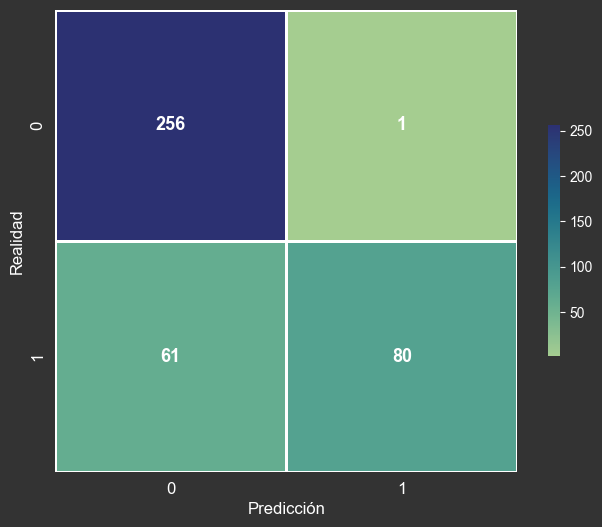

In [90]:

conf_mat = confusion_matrix(Y_test, y_pred)


sns.set_style("whitegrid")
sns.set_palette("deep")


plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#333333')


ax = sns.heatmap(conf_mat, annot=True, fmt='d', cmap="crest", cbar=True,
                 cbar_kws={ "orientation": "vertical",
                           "shrink": 0.5, "format": "%.0f", "extend": "neither", "extendfrac": None,
                           "extendrect": False, "drawedges": False}, linewidths=1, linecolor='white',
                 square=True, annot_kws={"color": "white", "fontweight": "bold","fontsize": 13})


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(color='white', labelsize=10)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')



ax.set_xlabel("Predicción", color='white', fontsize=12)
ax.set_ylabel("Realidad", color='white', fontsize=12)

labels_x = ax.get_xticklabels()
labels_y = ax.get_yticklabels()
ax.set_xticklabels(labels_x, fontsize=12, color='white')
ax.set_yticklabels(labels_y, fontsize=12, color='white')


In [92]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


with open('modelos/Random_Forest_SMOTEENN_mejor_modelo.pkl', 'rb') as file:
    modelo = pickle.load(file)


y_pred = modelo.predict(X_test)
print('DecisionTree:\n', classification_report(Y_test, y_pred))

print(y_pred)

DecisionTree:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       257
           1       0.82      0.60      0.69       141

    accuracy                           0.81       398
   macro avg       0.81      0.76      0.78       398
weighted avg       0.81      0.81      0.80       398

[0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0

C:\Users\Didac\AppData\Local\Temp\ipykernel_8236\3572472372.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

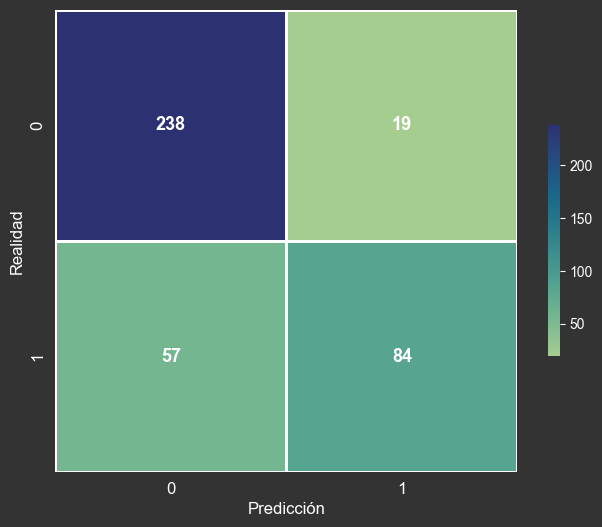

In [93]:

conf_mat = confusion_matrix(Y_test, y_pred)


sns.set_style("whitegrid")
sns.set_palette("deep")


plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#333333')


ax = sns.heatmap(conf_mat, annot=True, fmt='d', cmap="crest", cbar=True,
                 cbar_kws={ "orientation": "vertical",
                           "shrink": 0.5, "format": "%.0f", "extend": "neither", "extendfrac": None,
                           "extendrect": False, "drawedges": False}, linewidths=1, linecolor='white',
                 square=True, annot_kws={"color": "white", "fontweight": "bold","fontsize": 13})


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(color='white', labelsize=10)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')



ax.set_xlabel("Predicción", color='white', fontsize=12)
ax.set_ylabel("Realidad", color='white', fontsize=12)

labels_x = ax.get_xticklabels()
labels_y = ax.get_yticklabels()
ax.set_xticklabels(labels_x, fontsize=12, color='white')
ax.set_yticklabels(labels_y, fontsize=12, color='white')

## Conclusión

El modelo Decision Tree Balanced Accuracy: 0.8442 , Precision: 0.9877, Recall: 0.5674, F1 Score 0.7207 y ROC AUC 0.7817 muestra un rendimiento muy bueno en términos de precisión, pero el recall es bastante bajo, lo que indica que el modelo no es eficiente al identificar a todos los clientes que realmente comprarán el seguro. En este caso, el modelo está perdiendo alrededor del 40% de la clase más importante, la clase 1 (Sí compran el seguro).

Esto me hace pensar que para el caso de estudio sería mejor, el modelo Random Forest SMOTEENN Accuracy: 0.8090 , Precision: 0.8155, Recall: 0.5957, F1 Score 0.6885 y ROC AUC 0.7609. Este modelo sacrifica algo de precisión para mejorar el recall, lo que significa que el modelo es más eficiente al identificar la clase más importante. 

En conclusión, es fundamental tener en cuenta los objetivos del negocio al seleccionar el modelo, entiendo que en este caso es muy importante identificar a una mayor proporción de clientes que comprarán el seguro, ya que si el proyecto se pusiera en práctica esta diferencia podria significar una gran cantidad de potenciales futuros clientes.